# ANALIZA KNJIG

In [1]:
import pandas as pd
import os

Naložimo podatke ter jih shranimo.

In [2]:
ime_datoteke_knjige = os.path.join("obdelani-podatki", "knjige.csv")
ime_datoteke_zanri = os.path.join("obdelani-podatki", "zanri.csv")
ime_datoteke_opisi = os.path.join("obdelani-podatki", "opisi.csv")
knjige = pd.read_csv(ime_datoteke_knjige, index_col="id")
zanri = pd.read_csv(ime_datoteke_zanri, index_col="id")
opisi = pd.read_csv(ime_datoteke_opisi, index_col="id")

## Analiza knjig glede na oceno

In [4]:
knjige.sort_values("ocena", ascending=False).head(15)

,naslov,avtor,ocena,stevilo_ocen,stevilo_mnenj,leto_izdaje,stevilo_strani
id,,,,,,,
4624,"Ama Dios (4 AoL Consciousness Books Combined, ...",Nataša Pantović,5.00,6,2,2019,1869
246,The Addiction Manifesto,Jerry Weaver,4.89,1031,41,2021,178
1017,The Complete Calvin and Hobbes,Bill Watterson,4.80,38457,1115,2005,1456
4403,Addressed To Her: A Short Story,Granthana Sinha,4.80,15,11,2019,32
1978,Mark of the Lion Trilogy,Francine Rivers,4.77,12371,843,1998,1468
685,The Chain Between Worlds,Johnathon Nicolaou,4.76,769,30,2021,335
4541,Meditation: Insights and Inspirations,Amit Ray,4.75,161,37,2010,146
4721,Le Monogramme,Odysseas Elytis,4.75,2440,106,1997,40
4676,Words of Radiance,Brandon Sanderson,4.75,278398,16787,2014,1087


Kot vidimo zgoraj imajo knjige z malo ocenami lahko nerealne ocene, zato raje vzamemo knjige z več kot 50000 ocenami.

In [31]:
knjige[knjige.stevilo_ocen > 50000].sort_values("ocena", ascending=False).head(15)

,naslov,avtor,ocena,stevilo_ocen,stevilo_mnenj,leto_izdaje,stevilo_strani,razmerje,1
id,,,,,,,,,
4676,Words of Radiance,Brandon Sanderson,4.75,278398,16787,2014,1087,0.060299,1
4439,Know My Name,Chanel Miller,4.72,145110,20529,2019,384,0.141472,1
730,The Way of Kings,Brandon Sanderson,4.65,397766,27506,2010,1007,0.069151,1
226,The Essential Calvin and Hobbes: A Calvin and ...,Bill Watterson,4.64,117618,955,1988,256,0.008120,1
1349,Just Mercy: A Story of Justice and Redemption,Bryan Stevenson,4.63,202107,23270,2014,336,0.115137,1
14,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62,3338517,76478,2007,759,0.022908,1
3934,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.62,51257,461,1995,208,0.008994,1
3517,Kingdom of Ash,Sarah J. Maas,4.62,265609,26621,2018,984,0.100226,1
2490,A Court of Mist and Fury,Sarah J. Maas,4.62,836224,77671,2016,626,0.092883,1


Zdaj pa poglejmo še kakšne povprečne ocene imajo posamezni žanri.

In [6]:
knjige_z_zanri = pd.merge(knjige, zanri, left_on="id", right_on="id")
knjige_z_zanri[["ocena", "zanr"]].groupby("zanr").mean().sort_values("ocena", ascending=False).head(20)

,ocena
zanr,
Tarot,4.71000
Turkish Literature,4.56000
Turkish,4.56000
Catholic,4.53000
New Age,4.52000
Marathi,4.51000
Family,4.48000
Lds,4.45375
Islam,4.44600


Očitno so najbolje ocenjene religiozne knjige. Hipotezo, da bodo najbolje ocenjene klasike torej lahko zavržemo. Sploh pa poleg turške literature leposlovja sploh ni na spregled, pojavi se šele na 12. mestu s High Fantasy.  

Naravno vprašanje, ki sledi pa je v kakšnem razmerju sta povprečna ocena žanra in količina knjig napisanih v tem žanru.

Povprečna ocena ocen vseh žanrov je 4.07.


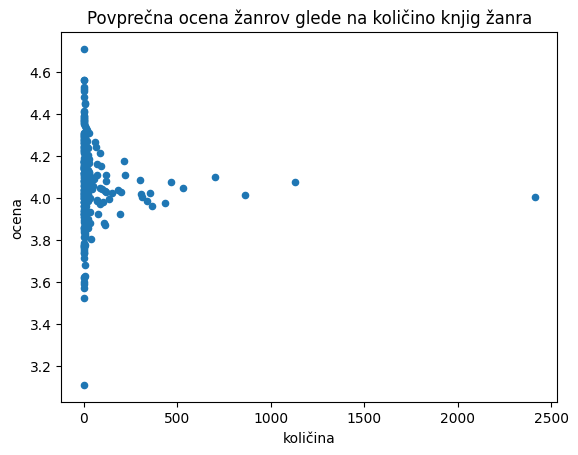

In [40]:
kolicina_po_zanrih = knjige_z_zanri.groupby("zanr").size().to_frame("kolicina")
ocene_po_zanrih = knjige_z_zanri.groupby("zanr")["ocena"].mean().to_frame("ocena")
povprecna_ocena = ocene_po_zanrih["ocena"].mean()
graf_ocen_po_kolicini = pd.merge(ocene_po_zanrih, kolicina_po_zanrih, left_on="zanr", right_on="zanr").plot.scatter(
    "kolicina", 
    "ocena", 
    title="Povprečna ocena žanrov glede na količino knjig žanra")
graf_ocen_po_kolicini.set_xlabel("količina")
graf_ocen_po_kolicini

print(f"Povprečna ocena ocen vseh žanrov je {povprecna_ocena:.2f}.")


Dobimo lepo porazdelitev, ki nam pokaže, da več kot je knjig napisanih v žanru, bližje bo ocena žanra povprečni oceni ocen vseh žanrov.

Odgovorimo zdaj še na vprašanje, ali dolžina knjige vpliva na oceno.

<AxesSubplot: title={'center': 'Graf ocen po številu strani'}, xlabel='ocena', ylabel='število strani'>

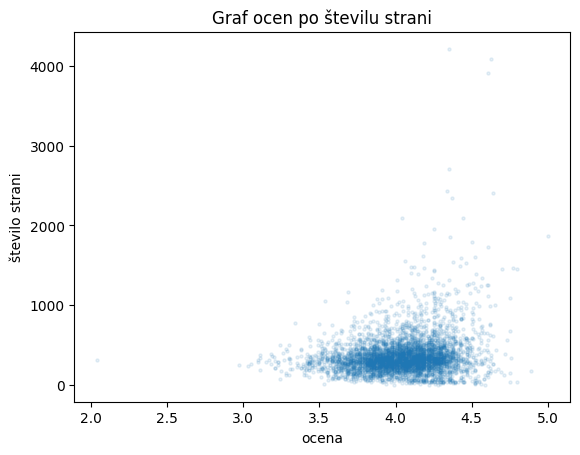

In [8]:
graf_ocen_po_st_strani = knjige.plot.scatter("ocena", "stevilo_strani", s=5, alpha=0.1, title="Graf ocen po številu strani")
graf_ocen_po_st_strani.set_ylabel("število strani")
graf_ocen_po_st_strani

> Temnejša kot je barva na grafu, tem več knjig ustreza številu strani in oceni v tej točki.

Graf nam pove, da če je knjiga dolga (več kot 1200 strani) ima dobro oceno, ampak obratno ne velja. Večina knjig ima cca 500 strani in oceno med 3.5 in 4.5. 

Poglejmo si še povprečno oceno knjig glede na leto. Vzeli bomo le knjige izdane po letu 1900.

<AxesSubplot: xlabel='leto_izdaje'>

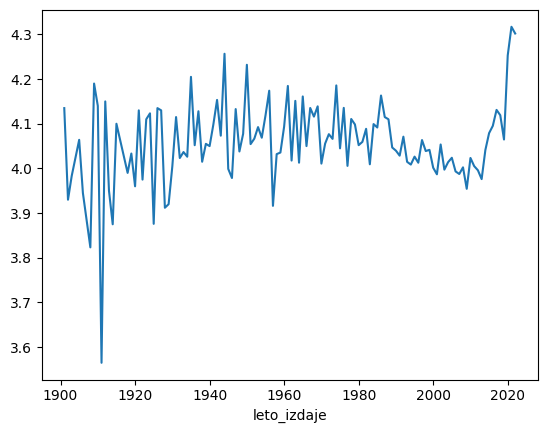

In [9]:
knjige[(knjige.leto_izdaje > 1900) & (knjige.leto_izdaje <= 2022)].groupby("leto_izdaje")["ocena"].mean().plot()

Graf nam ne pokaže nič posebnega, razen tega da se je v zadnjih nekaj letih povprečna ocena začela hitro naraščati.

## Analiza avtorjev


Denimo, da nas zanima kateri avtorji so v zadnjih 100 letih napisali največ knjig iz našega seznama.

In [42]:
avtorji_po_1922 = knjige[knjige.leto_izdaje > 1922].groupby("avtor")
stevilo_knjig_avtorjev = avtorji_po_1922.size().to_frame("kolicina").sort_values("kolicina", ascending=False)
stevilo_knjig_avtorjev

,kolicina
avtor,
Stephen King,51
Terry Pratchett,20
C.S. Lewis,19
John Grisham,17
Rick Riordan,16
...,...
Immaculée Ilibagiza,1
Ilya Ilf,1
Ilona Andrews,1


Na prvem mestu je očitno Stephen King s kar 51 knjigami, sledi pa mu Terry Pratchett s kar 31 knjigami manj.

Odgovorimo zdaj na vprašanje kateri avtorji pišejo najdaljše knjige.

In [11]:
statistike_avtorjev = stevilo_knjig_avtorjev
statistike_avtorjev["ocena"] = avtorji_po_1922["ocena"].mean()
statistike_avtorjev["stevilo_strani"] = avtorji_po_1922["stevilo_strani"].sum()
statistike_avtorjev["povprecna_dolzina"] = statistike_avtorjev["stevilo_strani"] / statistike_avtorjev["kolicina"]
avtorji_urejeni_po_povprecni_dolzini = statistike_avtorjev.sort_values("povprecna_dolzina", ascending=False)

Podatke prikažimo grafično. Omejimo se na prvih 40 avtorjev da bo graf pregleden.

<AxesSubplot: title={'center': 'Povprečna dolžina knjig posameznih avtorjev'}, xlabel='avtor'>

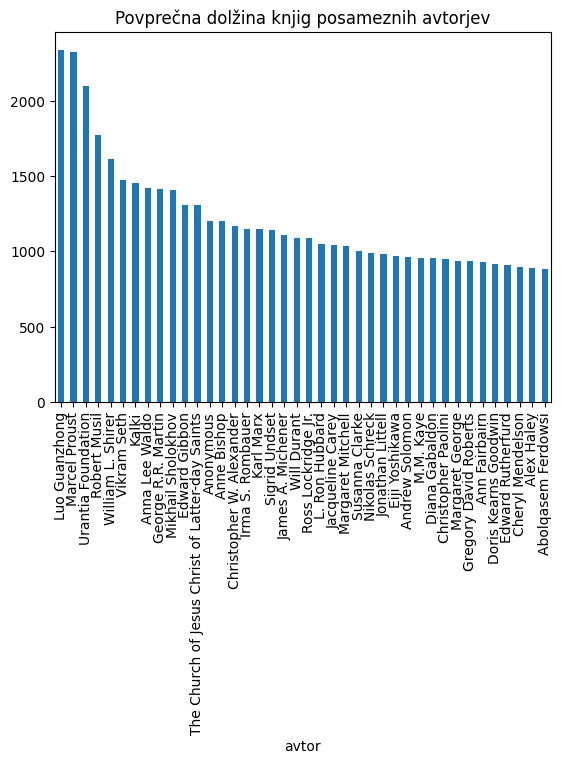

In [12]:
graf_povprecnih_dolzin = avtorji_urejeni_po_povprecni_dolzini["povprecna_dolzina"].head(40).plot(
    kind="bar", 
    title="Povprečna dolžina knjig posameznih avtorjev"
    )
graf_povprecnih_dolzin

Luo Guanzhong, Marcel Proust in Urantia Foundation so pisali daleč najdaljše knjige (več kot 2000 strani).

Porodi se nam vprašanje, ali so napisali samo kakšno tako dolgo knjigo, ali pa so jih več. Zato lahko pogledamo naslednji graf.

Text(0, 0.5, 'povprečna dolžina')

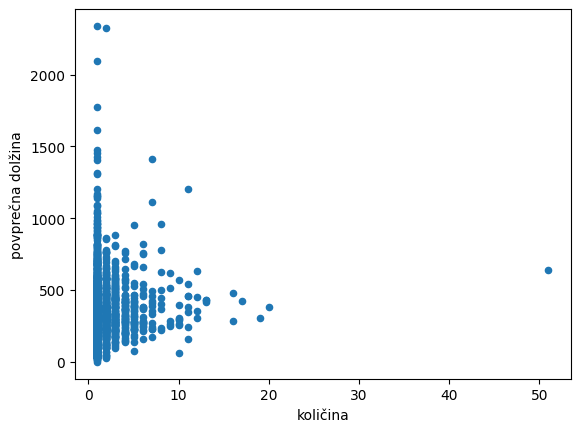

In [13]:
graf_povprecne_dolzine_po_kolicini = avtorji_urejeni_po_povprecni_dolzini.plot.scatter(
    "kolicina", 
    "povprecna_dolzina"
    )
graf_povprecne_dolzine_po_kolicini.set_xlabel("količina")
graf_povprecne_dolzine_po_kolicini.set_ylabel("povprečna dolžina")

Vidimo, da so avtorji z najdaljšimi povprečji res napisali le eno ali dve taki knjigi. Zato lahko pogledamo kaj se zgodi, če se omejimo na avtorje, ki si napisali več kot 5 knjig.

<AxesSubplot: title={'center': 'Povprečna dolžina knjig avtorjev z več kot 5 knjigami na seznamu'}, xlabel='avtor'>

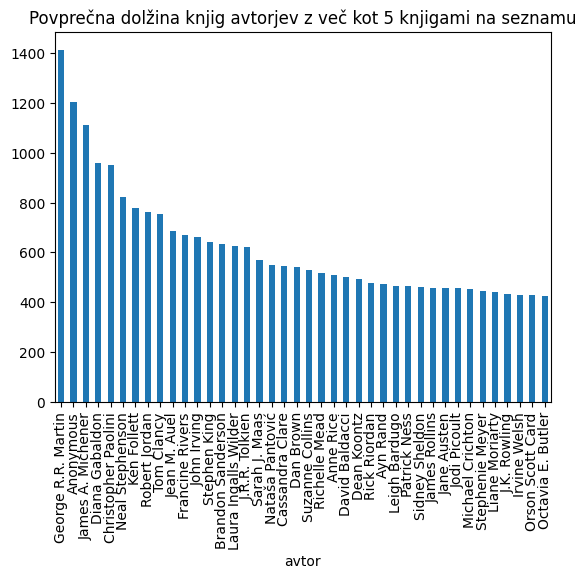

In [14]:
graf_povprecnih_dolzin2 = avtorji_urejeni_po_povprecni_dolzini[
    avtorji_urejeni_po_povprecni_dolzini.kolicina >= 5]["povprecna_dolzina"].head(40).plot(
        kind="bar",
        title="Povprečna dolžina knjig avtorjev z več kot 5 knjigami na seznamu"
    )
graf_povprecnih_dolzin2

Po teh podatkih pa vidimo, da je George R.R. Martin napisal povprečno najdaljše knjige.

## Analiza mnenj in ocen

V tem razdelku bomo odgovorili še na zadnjo hipotezo. 

<AxesSubplot: xlabel='ocena', ylabel='razmerje'>

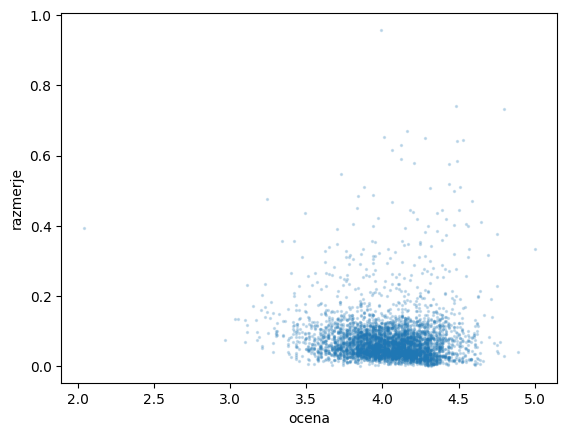

In [29]:
knjige_z_razmerjem = knjige
knjige_z_razmerjem["razmerje"] = knjige_z_razmerjem["stevilo_mnenj"] / knjige_z_razmerjem["stevilo_ocen"]
knjige_z_razmerjem.plot.scatter("ocena", "razmerje", s=2, alpha=0.2)

> Temnejša kot je barva, tem več knjig ustreza oceni in razmerju na tej točki.

Graf nam pokaže, da ni nobene povezave med razmerjem med ocenami in mnenji ter oceno, saj je prikaz enako gost za razmerja med cca 0.05 in 0.15 ter za ocene med cca 3.7 in 4.3. Pokaže pa, da ima večina knjig razmerje med številom ocen in številom mnenj manjše od 0.2.